In [1]:
import fractions
import math
import random

import numpy as np

In [467]:
class NeuralNetworkOutput:
    threshold = 1e-4

    def __init__(self, weight, index):
        self.weight = weight
        self.index = index

    def __repr__(self):
        return f'weight: {self.weight}'

    def __eq__(self, other):
        print(np.column_stack((np.array(self.weight), np.array(other))))
        return max([abs(w[0] - w[1]) for w in zip(self.weight, other)]) < NeuralNetworkOutput.threshold


class NeuralNetwork:
    @staticmethod
    def default_alert(**kwargs):
        print(kwargs)

    def neural_network(self, information):
        return self.weight.dot(information)

    def __set_alpha(self):
        # alpha = (10 ** -(math.floor(np.emath.log10(np.mean(np.array(self.goal_data)))) + math.floor(
        #     np.emath.log10(np.mean(np.array(self.information)))))) * 5
        # print(alpha)
        alpha = 5e-10
        self.alpha = [alpha for _ in range(len(self.information))]

    def __init__(self, information, goal, threshold=1e-5, log=None):  # noqa
        self.information = information
        self.goal_data = goal
        self.initial_weight = [0.01 for _ in range(len(information))]
        self.weight = np.array(self.initial_weight.copy())
        self.threshold = threshold
        self.__set_alpha()
        if log is None:
            self.log = NeuralNetwork.default_alert
        else:
            self.log = log

    def train(self):
        idx = 0
        self.weight = np.array(self.initial_weight.copy())
        for info, goal_item in zip(np.array(self.information).T, self.goal_data):
            idx += 1
            self.weight -= (err := ((predicted := self.train_step(info)) - goal_item)) * info * self.alpha
            self.log(step=idx, weight=self.weight, error=err ** 2, predict=predicted, information=info,
                     goal=goal_item)
            if goal_item != 0 and err ** 2 < self.threshold:
                return NeuralNetworkOutput(self.weight, idx)

    def train_step(self, information):
        return self.neural_network(information)


def read(**kwargs):
    for name, val in kwargs.items():
        print(f"{name}: {val}")


number_of_data = 1000
data = [np.random.randint(1, 100, 100000) for _ in range(number_of_data)]
goal_weights = [random.randint(1, 100) for _ in range(number_of_data)]
goal = np.array([info * goal_weight for info, goal_weight in zip(data, goal_weights)]).sum(axis=0)
_information = data[0][0].reshape(60000, -1)
_goal = data[0][1]
neural_network_output = (neural_network := NeuralNetwork(_information, _goal))#.train()
print(goal_weights)
print(neural_network_output)
neural_network_output

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

5


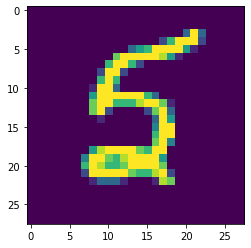

In [446]:
from matplotlib import pyplot as plt

index = 31013
plt.imshow(data[0][0][index], interpolation='nearest')
print(data[0][1][index])
plt.show()
